**Import Libraries**

In [ ]:
# Import necessary libraries

# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Data preprocessing
from sklearn.utils import resample                      # Sampling methods
from imblearn.over_sampling import SMOTE                # Over sampling
from imblearn.over_sampling import ADASYN               # Over sampling
from sklearn.model_selection import train_test_split    # Splitting datasets

# Feature engineering
import datetime as dt
from sklearn.preprocessing import StandardScaler    # Feature scaling
!pip install category_encoders                      # Install the category_encoders library
from category_encoders import WOEEncoder            # Import the WOEEncoder class from the category_encoders library
from sklearn.preprocessing import LabelEncoder

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc, roc_auc_score

# Style and color palette for seaborn plots
sns.set_style('whitegrid') # sets the visual style of Seaborn plots to 'whitegrid', which displays a white background with grid lines.
sns.set_palette('pastel')  # sets the color palette to 'pastel', which is one of the predefined color palettes provided by Seaborn. It consists of a set of visually distinct colors suitable for plotting categorical data.

# Manage warning messages
import warnings
warnings.simplefilter("ignore")     # Ignore all warnings

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00


**Load Data**

In [ ]:
# Install kaggle

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

**Dataset 4**

In [ ]:
# Download datasets from Kaggle

! kaggle datasets download dhanushnarayananr/credit-card-fraud/

 59% 17.0M/28.9M [00:00<00:00, 30.2MB/s]
100% 28.9M/28.9M [00:00<00:00, 48.1MB/s]


In [ ]:
# Unzip dataset zip file

! unzip credit-card-fraud.zip

Archive:  credit-card-fraud.zip
  inflating: card_transdata.csv      


In [ ]:
# Load the datasets

# Dataset 4
train_df4 = pd.read_csv('/content/card_transdata.csv', index_col='distance_from_home')

**Exploratory Data Analysis**

In [ ]:
# Display the forth few rows of the train dataset

train_df4.head(3)

,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,,,,,,,
57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Display basic information about the datasets

# Dataset 4
print("\nTrain Data Info for Dataset 4:")
print(train_df4.info())


Train Data Info for Dataset 4:
<class 'pandas.core.frame.DataFrame'>
Float64Index: 1000000 entries, 57.87785658389723 to 58.10812496080576
Data columns (total 7 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_last_transaction  1000000 non-null  float64
 1   ratio_to_median_purchase_price  1000000 non-null  float64
 2   repeat_retailer                 1000000 non-null  float64
 3   used_chip                       1000000 non-null  float64
 4   used_pin_number                 1000000 non-null  float64
 5   online_order                    1000000 non-null  float64
 6   fraud                           1000000 non-null  float64
dtypes: float64(7)
memory usage: 61.0 MB
None


In [ ]:
# Dataset 4
print("\nShape of Train Dataset 4\n")
print(train_df4.shape)


Shape of Train Dataset 4

(1000000, 7)


In [ ]:
# Check for missing values and duplicate values in dataset

# Dataset 4
print("\nMissing values and duplicate values in dataset 4\n")
print(train_df4.isna().sum().sum())
print(train_df4.duplicated().sum())


Missing values and duplicate values in dataset 4

0
0


**Null values and duplicate values are not found.**

In [ ]:
# Display summary statistics of the train dataset

# Dataset 4
print("\nTrain Data 4 Summary Statistics:\n")
print(train_df4.describe())


Train Data 4 Summary Statistics:

       distance_from_last_transaction  ratio_to_median_purchase_price  \
count                  1000000.000000                  1000000.000000   
mean                         5.036519                        1.824182   
std                         25.843093                        2.799589   
min                          0.000118                        0.004399   
25%                          0.296671                        0.475673   
50%                          0.998650                        0.997717   
75%                          3.355748                        2.096370   
max                      11851.104565                      267.802942   

       repeat_retailer       used_chip  used_pin_number    online_order  \
count   1000000.000000  1000000.000000   1000000.000000  1000000.000000   
mean          0.881536        0.350399         0.100608        0.650552   
std           0.323157        0.477095         0.300809        0.476796   
min    

In [ ]:
# Number of fraud and legitimate transactions

# Dataset 4
print("\nTrain Dataset 4")
is_fraud = train_df4["fraud"].value_counts()
print("Fraud: ",is_fraud[1])
print("Legitimate: ",is_fraud[0])


Train Dataset 4
Fraud:  87403
Legitimate:  912597



Train Dataset 4



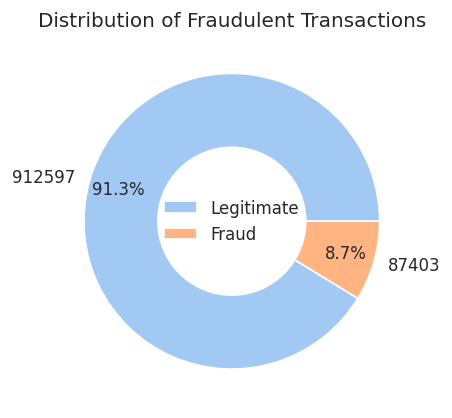

In [ ]:
# Visualize the distribution of the target variable (fraudulent or not)

# Dataset 4
print("\nTrain Dataset 4\n")
donut = train_df4["fraud"].value_counts().reset_index()

labels = ["Legitimate", "Fraud"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["count"],
        labels=donut["count"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribution of Fraudulent Transactions")
plt.legend(labels, loc="center", frameon=False)
plt.show();

**The dataset is highly imbalanced.**


**91.3% is not fraud and only 8.7% is fraud leads to imbalanced data**

In [ ]:
train_df4.corr()

,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_last_transaction,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


<Axes: >

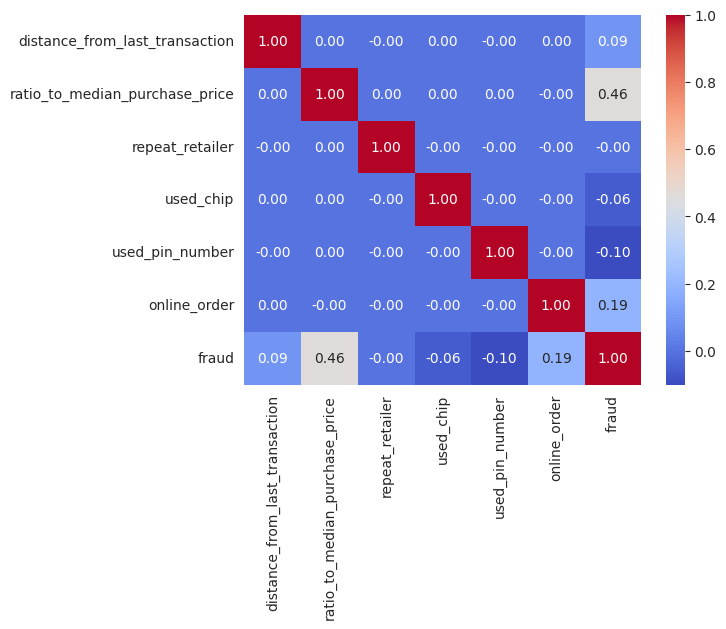

In [ ]:
sns.heatmap(train_df4.corr(),annot=True,cmap='coolwarm', fmt=".2f")

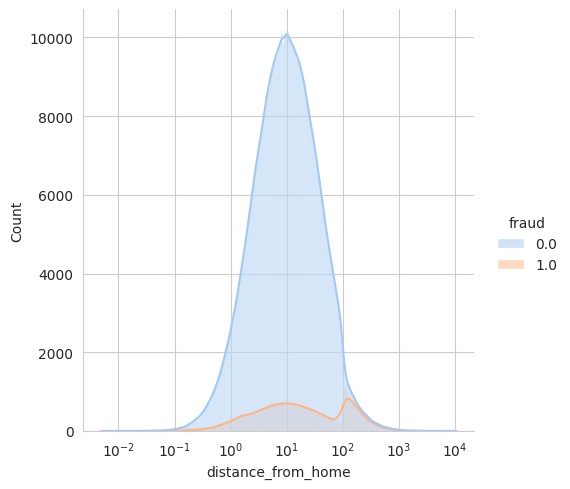

In [ ]:
sns.displot(data=train_df4, x='distance_from_home', hue='fraud', log_scale=True, kde=True)
plt.show()

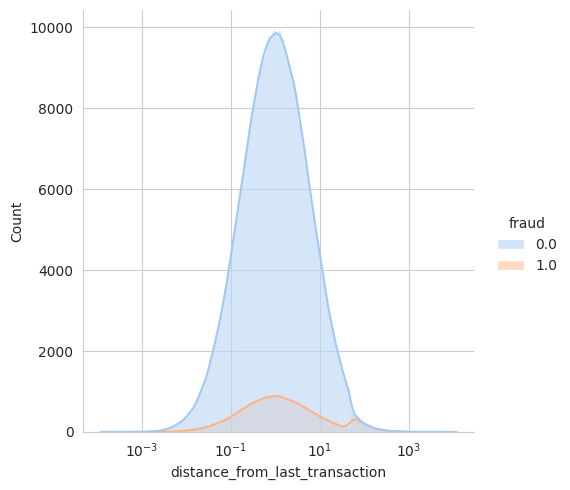

In [ ]:
sns.displot(data=train_df4, x='distance_from_last_transaction', hue='fraud', log_scale=True, kde=True)
plt.show()

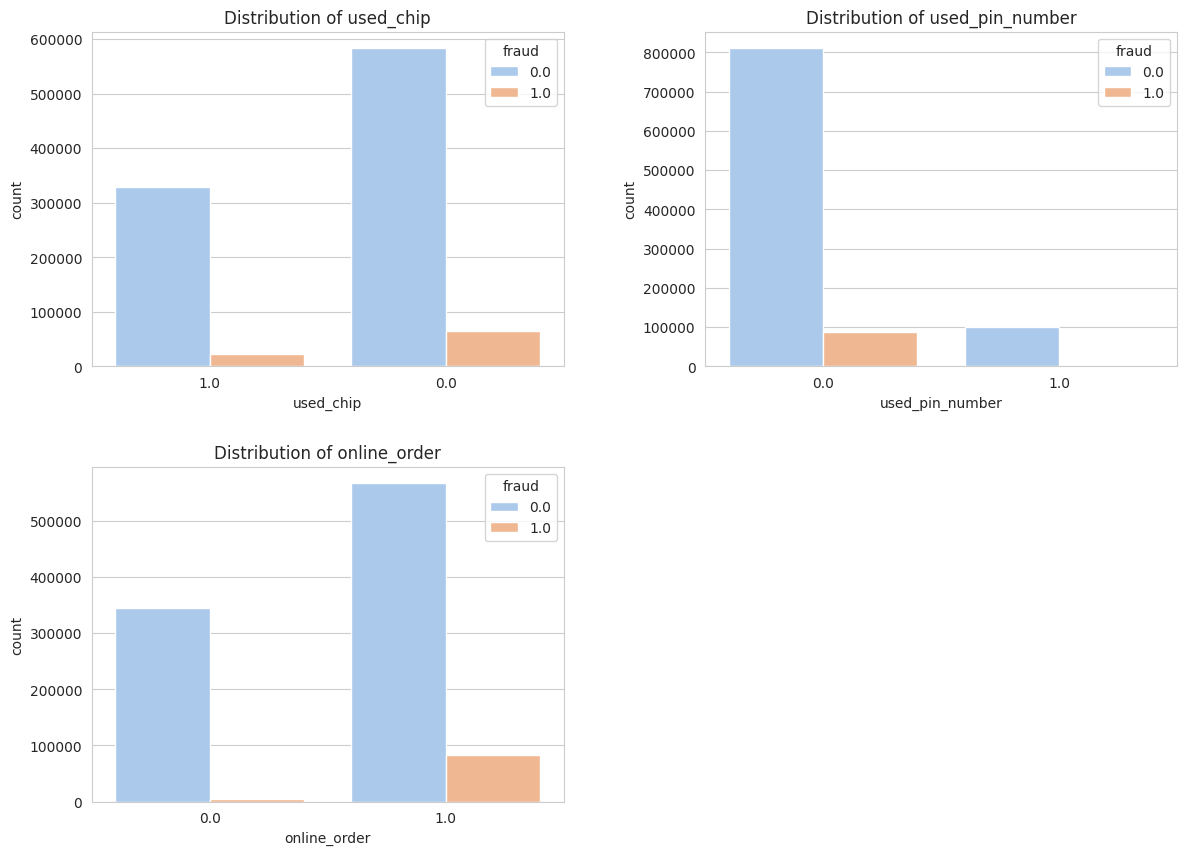

In [ ]:
feats_to_plot = train_df4.columns[3:-1]
plt.figure(figsize=(14,10))
for i, col in enumerate(feats_to_plot):
    plt.subplot(2,2,i+1)
    sns.countplot(x=train_df4[col].astype(str), hue=train_df4['fraud'])
    plt.title(f'Distribution of {col}')
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

We have only 8 columns

In [ ]:
# Separate features and labels
X_train4 = train_df4.drop('fraud', axis=1)
y_train4 = train_df4['fraud']

In [ ]:
# Splitting the dataset
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_train4, y_train4, test_size=0.2, random_state=65)

**Case 1: Undersampling**

As our data is imbalanced, we will use Resampling Techniques.

Under sampling technique:

In [ ]:
# Combined features and labels for train data for undersampling
combined_train_df4 = pd.concat([X_train4, y_train4], axis=1)

In [ ]:
# Separate majority and minority classes for train dataset
majority_class = combined_train_df4[combined_train_df4['fraud'] == 0]
minority_class = combined_train_df4[combined_train_df4['fraud'] == 1]

# Downsample majority class
downsampled_majority = resample(majority_class,
                                 replace=False,  # sample without replacement
                                 n_samples=len(minority_class),  # match minority class
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
downsampled_train_data = pd.concat([downsampled_majority, minority_class])

In [ ]:
# Separate features and labels again
X_train4_downsampled = downsampled_train_data.drop('fraud', axis=1)
y_train4_downsampled = downsampled_train_data['fraud']

In [ ]:
# Feature Scaling

scaler = StandardScaler()
X_train4_downsampled_scaled = scaler.fit_transform(X_train4_downsampled)
X_test4_scaled = scaler.transform(X_test4)

In [ ]:
# Combined features and labels for test data
combined_test_df4 = pd.concat([X_test4_scaled, y_test4], axis=1)

combined_test_df4 = combined_test_df4.sample(frac=0.25, random_state=42)

# Check the shape of the sampled dataset
print("Shape of sampled test dataset:", combined_test_df4.shape)

# Separate features and labels again
X_test4_scaled = combined_test_df4.drop('fraud', axis=1)
y_test4 = combined_test_df4['fraud']

In [ ]:
# Checking newly created data
print('Current length of the training set: ', len(y_train4_downsampled))

Current length of the training set:  140418


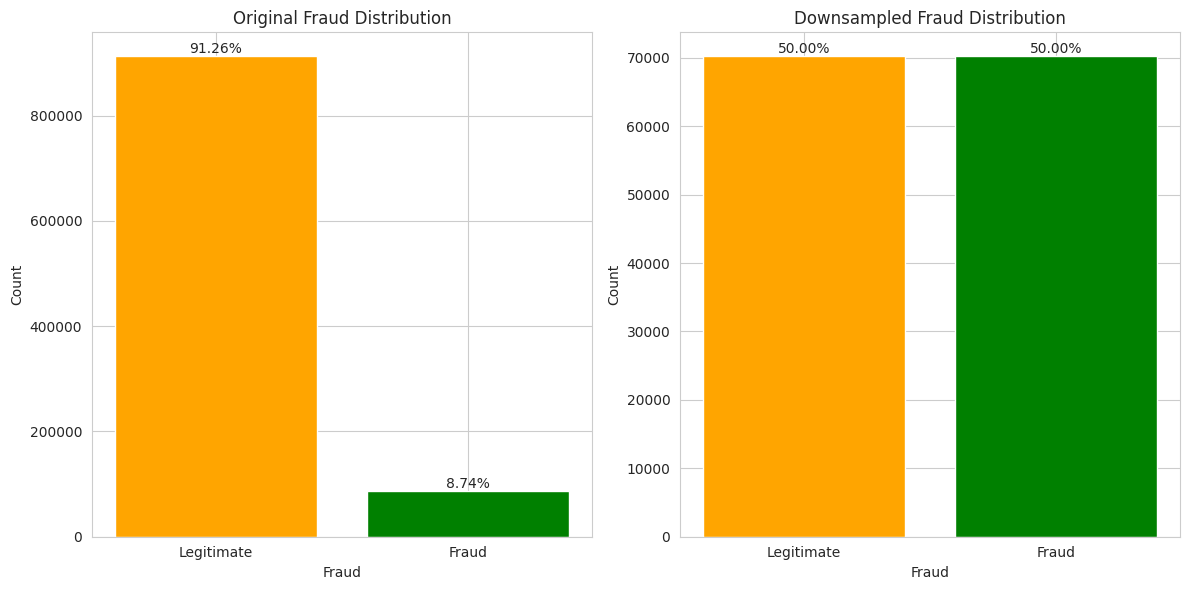

In [ ]:
# Count the occurrences of each class in the original dataset
original_fraud_counts = train_df4["fraud"].value_counts()

# Count the occurrences of each class in the downsampled dataset
downsampled_fraud_counts = y_train4_downsampled.value_counts()

# Calculate the percentage of each class
original_percentages = original_fraud_counts / len(train_df4) * 100
downsampled_percentages = downsampled_fraud_counts / len(y_train4_downsampled) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original fraud distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_fraud_counts.index, original_fraud_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Fraud Distribution')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.xticks(original_fraud_counts.index, ['Legitimate', 'Fraud'])

# Bar chart for downsampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_fraud_counts.index, downsampled_fraud_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Fraud Distribution')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.xticks(downsampled_fraud_counts.index, ['Legitimate', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

**MACHINE LEARNING MODEL TRAINING**

[1] Logistic Regression -> LR

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train4_downsampled_scaled, y_train4_downsampled)
predict_LR = LR_model.predict(X_test4_scaled)
print(classification_report(y_test4, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test4)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_LR = LR_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_LR)

# Calculate AUC
auc_LR = roc_auc_score(y_test4, y_probs_LR)

print('AUC for Logistic Regression: {:.2f}'.format(auc_LR))

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93    182806
         1.0       0.41      0.83      0.55     17194

    accuracy                           0.88    200000
   macro avg       0.70      0.86      0.74    200000
weighted avg       0.93      0.88      0.90    200000

Logistic Regression accuracy is: 88.25%
AUC for Logistic Regression: 0.94


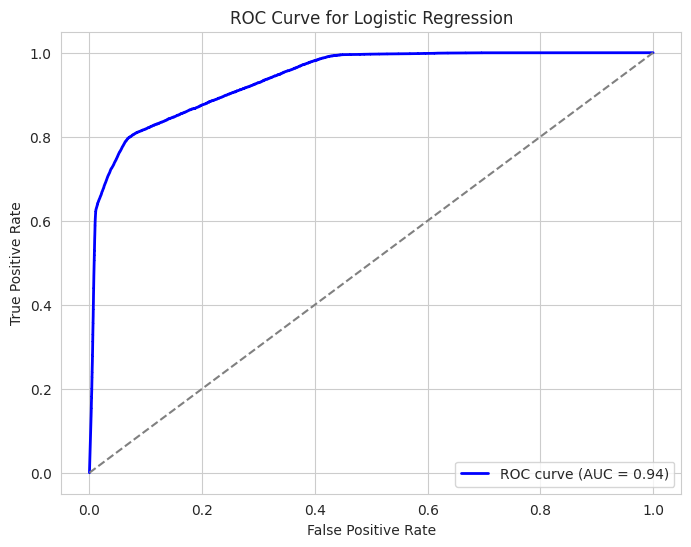

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_LR))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

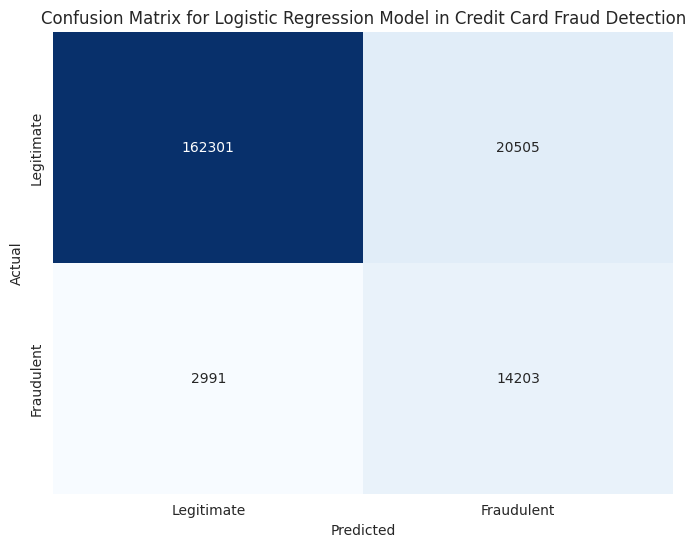

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_LR)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_LR, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_LR]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.409214
1     Recall  0.826044
2   F1-Score  0.547301
3   Accuracy  0.882520
4        AUC  0.939829


[2] Decision Tree Model (ID3)

In [ ]:
DT_model = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT_model.fit(X_train4_downsampled_scaled, y_train4_downsampled)
predict_DT = DT_model.predict(X_test4_scaled)
print(classification_report(y_test4, predict_DT))
DT_accuracy = accuracy_score(predict_DT,y_test4)
print('Decision Tree Classifier model accuracy is: {:.2f}%'.format(DT_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_DT = DT_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_DT)

# Calculate AUC
auc_DT = roc_auc_score(y_test4, y_probs_DT)

print('AUC for Decision Tree Classifier: {:.2f}'.format(auc_DT))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97    182806
         1.0       0.63      0.74      0.68     17194

    accuracy                           0.94    200000
   macro avg       0.80      0.85      0.82    200000
weighted avg       0.94      0.94      0.94    200000

Decision Tree Classifier model accuracy is: 93.95%
AUC for Decision Tree Classifier: 0.85


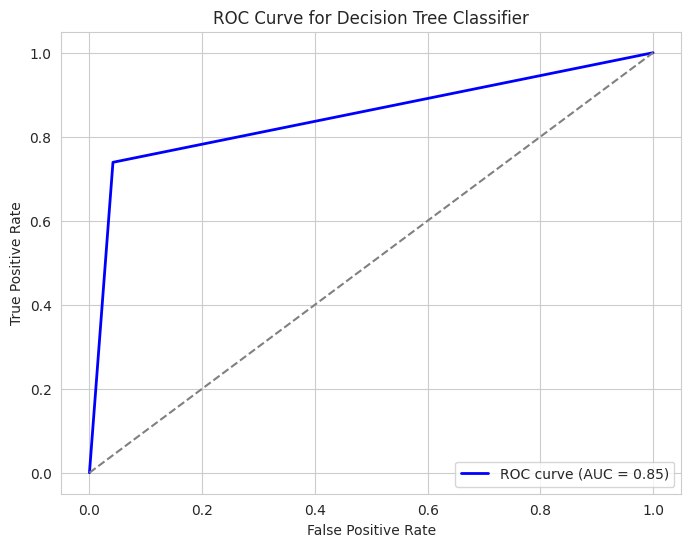

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_DT))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

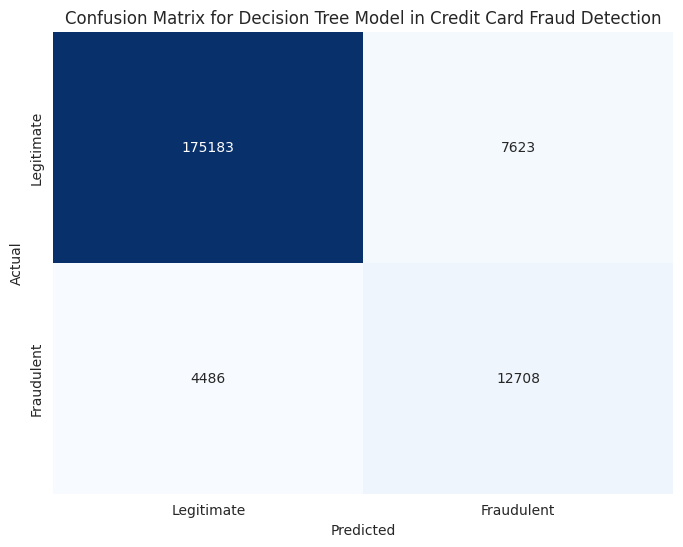

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_DT)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_DT, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_DT]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.625055
1     Recall  0.739095
2   F1-Score  0.677308
3   Accuracy  0.939455
4        AUC  0.848698


[3] XGB Classifier

In [ ]:
# Initialize and train the XGBoost classifier
XGB_model = XGBClassifier(random_state=0)
XGB_model.fit(X_train4_downsampled_scaled, y_train4_downsampled)

# Make predictions on the test set
predict_XGB = XGB_model.predict(X_test4_scaled)

# Evaluate the model
print(classification_report(y_test4, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test4)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_XGB = XGB_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_XGB)

# Calculate AUC
auc_XGB = roc_auc_score(y_test4, y_probs_XGB)

print('AUC for XGBoost classifier: {:.2f}'.format(auc_XGB))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    182806
         1.0       0.80      0.79      0.80     17194

    accuracy                           0.96    200000
   macro avg       0.89      0.89      0.89    200000
weighted avg       0.96      0.96      0.96    200000

XGBoost model accuracy is: 96.49%
AUC for XGBoost classifier: 0.96


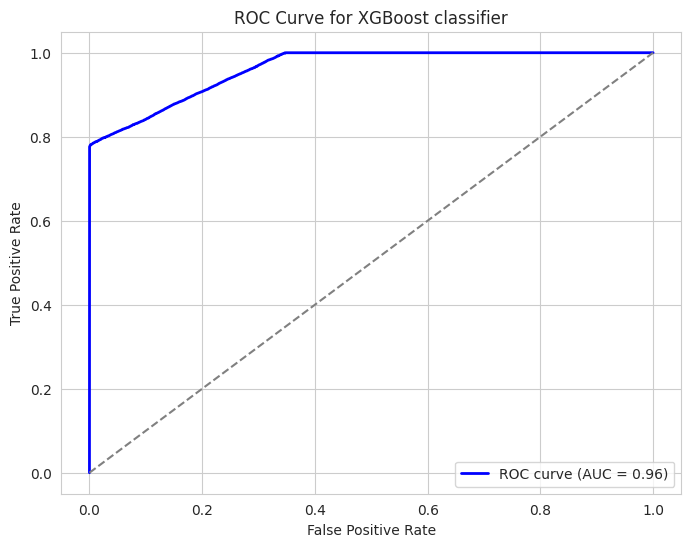

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_XGB))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

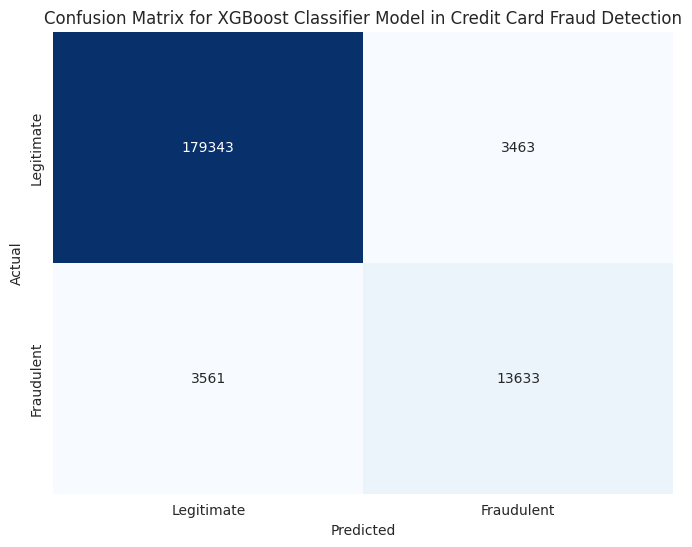

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_XGB)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_XGB, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_XGB]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.797438
1     Recall  0.792893
2   F1-Score  0.795159
3   Accuracy  0.964880
4        AUC  0.961966


[4] Random Forest Classifier

In [ ]:
# Initialize and train the Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)
RF_model.fit(X_train4_downsampled_scaled, y_train4_downsampled)

predict_RF = RF_model.predict(X_test4_scaled)

# Evaluate the model
print(classification_report(y_test4, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test4)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_RF = RF_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_RF)

# Calculate AUC
auc_RF = roc_auc_score(y_test4, y_probs_RF)

print('AUC for Random Forest classifier: {:.2f}'.format(auc_RF))

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94    182806
         1.0       0.46      0.84      0.59     17194

    accuracy                           0.90    200000
   macro avg       0.72      0.87      0.77    200000
weighted avg       0.94      0.90      0.91    200000

Random Forest model accuracy is: 89.98%
AUC for Random Forest classifier: 0.96


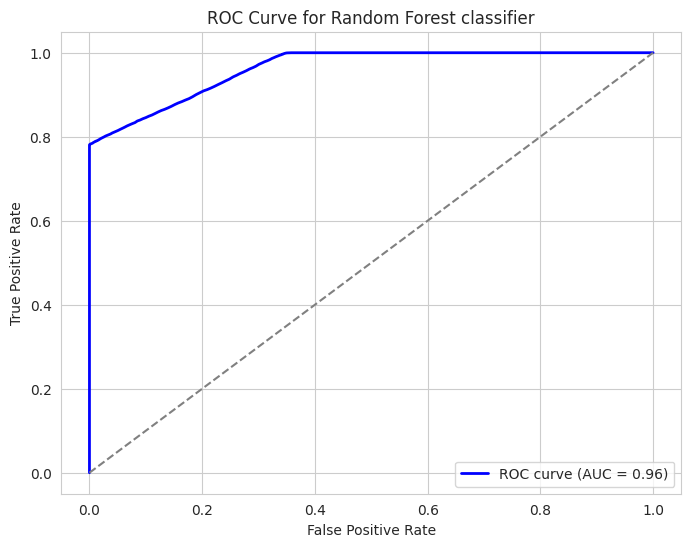

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_RF))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

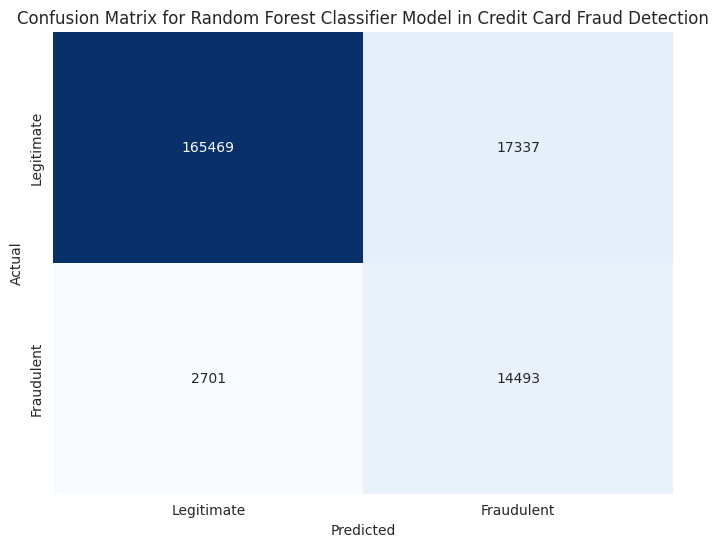

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_RF)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_RF, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_RF]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.455325
1     Recall  0.842910
2   F1-Score  0.591261
3   Accuracy  0.899810
4        AUC  0.962195


[5] K-Nearest Neighbors (KNN) Model

In [ ]:
# Instantiate KNN model
KNN_model = KNeighborsClassifier()

# Train the KNN model
KNN_model.fit(X_train4_downsampled_scaled, y_train4_downsampled)

# Make predictions on the test set
predict_KNN = KNN_model.predict(X_test4_scaled)

# Evaluate the performance of KNN model
print("Classification Report for K-Nearest Neighbors (KNN) Model:")
print(classification_report(y_test4, predict_KNN))

# Calculate accuracy
KNN_accuracy = accuracy_score(predict_KNN, y_test4)
print('K-Nearest Neighbors (KNN) accuracy is: {:.2f}%'.format(KNN_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_KNN = KNN_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_KNN)

# Calculate AUC
auc_KNN = roc_auc_score(y_test4, y_probs_KNN)

print('AUC for K-Nearest Neighbors (KNN): {:.2f}'.format(auc_KNN))

Classification Report for K-Nearest Neighbors (KNN) Model:
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94    182806
         1.0       0.44      0.85      0.58     17194

    accuracy                           0.89    200000
   macro avg       0.71      0.87      0.76    200000
weighted avg       0.94      0.89      0.91    200000

K-Nearest Neighbors (KNN) accuracy is: 89.45%
AUC for K-Nearest Neighbors (KNN): 0.95


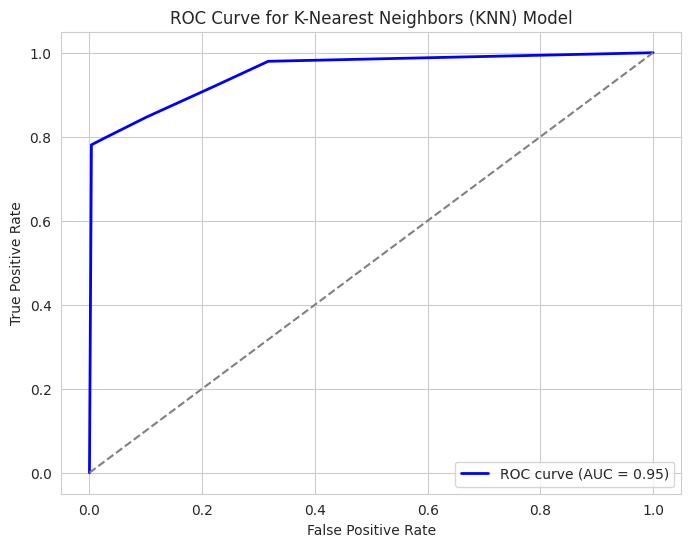

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_KNN))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors (KNN) Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

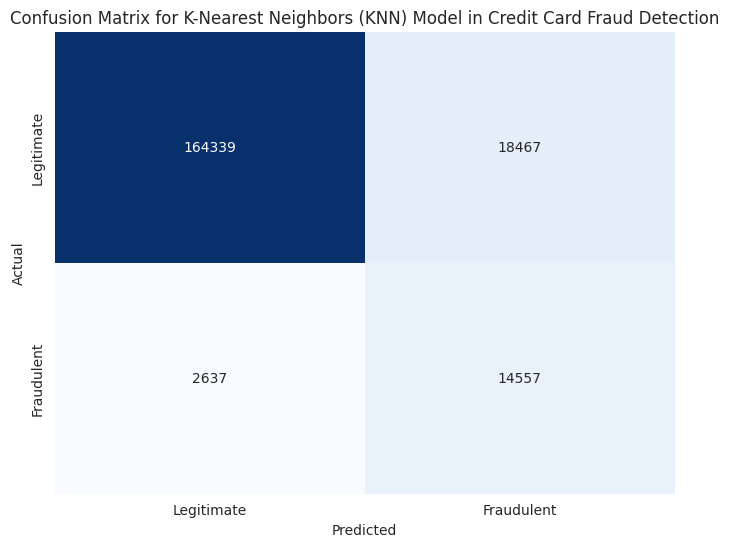

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_KNN)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN) Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_KNN, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_KNN]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.440801
1     Recall  0.846633
2   F1-Score  0.579752
3   Accuracy  0.894480
4        AUC  0.953902


In [ ]:
# Define the metrics for each model and sampling technique

# Define the classification report dictionary for logistic regression
classification_report_dict_LR = classification_report(y_test4, predict_LR, output_dict=True)

metrics_logistic_regression = {
    'precision': "{:.2f}".format(classification_report_dict_LR['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_LR['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_LR['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(LR_accuracy),
    'auc': "{:.2f}".format(auc_LR)
}

# Define the classification report dictionary for decision tree
classification_report_dict_DT = classification_report(y_test4, predict_DT, output_dict=True)

metrics_decision_tree = {
    'precision': "{:.2f}".format(classification_report_dict_DT['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_DT['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_DT['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(DT_accuracy),
    'auc': "{:.2f}".format(auc_DT)
}

# Define the classification report dictionary for XGB Classifier
classification_report_dict_XGB = classification_report(y_test4, predict_XGB, output_dict=True)

metrics_xgb_classifier = {
    'precision': "{:.2f}".format(classification_report_dict_XGB['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_XGB['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_XGB['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(XGB_accuracy),
    'auc': "{:.2f}".format(auc_XGB)
}

# Define the classification report dictionary for Random Forest
classification_report_dict_RF = classification_report(y_test4, predict_RF, output_dict=True)

metrics_random_forest = {
    'precision': "{:.2f}".format(classification_report_dict_RF['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_RF['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_RF['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(RF_accuracy),
    'auc': "{:.2f}".format(auc_RF)
}

# Define the classification report dictionary for KNeighbors Classifier
classification_report_dict_KNN = classification_report(y_test4, predict_KNN, output_dict=True)

metrics_kneighbors = {
    'precision': "{:.2f}".format(classification_report_dict_KNN['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_KNN['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_KNN['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(KNN_accuracy),
    'auc': "{:.2f}".format(auc_KNN)
}

# Create a DataFrame to store the metrics
metrics_df_undersampling = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGB Classifier', 'Random Forest', 'KNeighbors Classifier'],
    'Precision': [metrics_logistic_regression['precision'], metrics_decision_tree['precision'], metrics_xgb_classifier['precision'], metrics_random_forest['precision'], metrics_kneighbors['precision']],
    'Recall': [metrics_logistic_regression['recall'], metrics_decision_tree['recall'], metrics_xgb_classifier['recall'], metrics_random_forest['recall'], metrics_kneighbors['recall']],
    'F1-Score': [metrics_logistic_regression['f1-score'], metrics_decision_tree['f1-score'], metrics_xgb_classifier['f1-score'], metrics_random_forest['f1-score'], metrics_kneighbors['f1-score']],
    'Accuracy': [metrics_logistic_regression['accuracy'], metrics_decision_tree['accuracy'], metrics_xgb_classifier['accuracy'], metrics_random_forest['accuracy'], metrics_kneighbors['accuracy']],
    'AUC': [metrics_logistic_regression['auc'], metrics_decision_tree['auc'], metrics_xgb_classifier['auc'], metrics_random_forest['auc'], metrics_kneighbors['auc']]
})

# Print the DataFrame
print("Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for dataset 4 with Undersampling:")
print(metrics_df_undersampling)

Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for dataset 4 with Undersampling:
                   Model Precision Recall F1-Score Accuracy   AUC
0    Logistic Regression      0.41   0.83     0.55     0.88  0.94
1          Decision Tree      0.63   0.74     0.68     0.94  0.85
2         XGB Classifier      0.80   0.79     0.80     0.96  0.96
3          Random Forest      0.46   0.84     0.59     0.90  0.96
4  KNeighbors Classifier      0.44   0.85     0.58     0.89  0.95


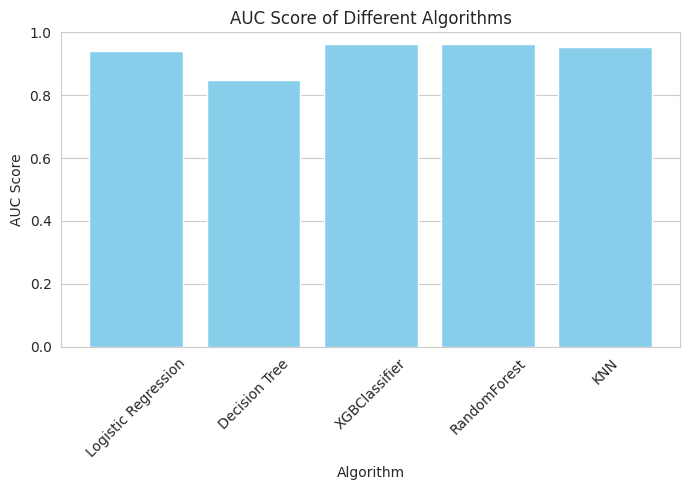

In [ ]:
Algorithms = ['Logistic Regression', 'Decision Tree', 'XGBClassifier', 'RandomForest', 'KNN']
AUC = [auc_LR, auc_DT, auc_XGB, auc_RF, auc_KNN]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'AUC Score':AUC})

plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['AUC Score'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('AUC Score')
plt.title('AUC Score of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (AUC Score ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Over Sampling**

**Case 2: SMOTE Oversampling**

In [ ]:
# Seperating the labels
X_train4_SMOTE = train_df4.drop('fraud', axis=1)
y_train4_SMOTE = train_df4['fraud']

In [ ]:
# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train4_SMOTE, y_train4_SMOTE = smote.fit_resample(X_train4_SMOTE, y_train4_SMOTE)

In [ ]:
# Splitting the dataset
X_train4_SMOTE, X_test4, y_train4_SMOTE, y_test4 = train_test_split(X_train4_SMOTE, y_train4_SMOTE, test_size=0.2, random_state=65)

In [ ]:
# Feature Scaling

scaler = StandardScaler()
X_train4_SMOTE_scaled = scaler.fit_transform(X_train4_SMOTE)
X_test4_scaled = scaler.transform(X_test4)

In [ ]:
# checking newly created data
print('Current length of the training set: ', len(X_train4_SMOTE_scaled))

Current length of the training set:  1460155


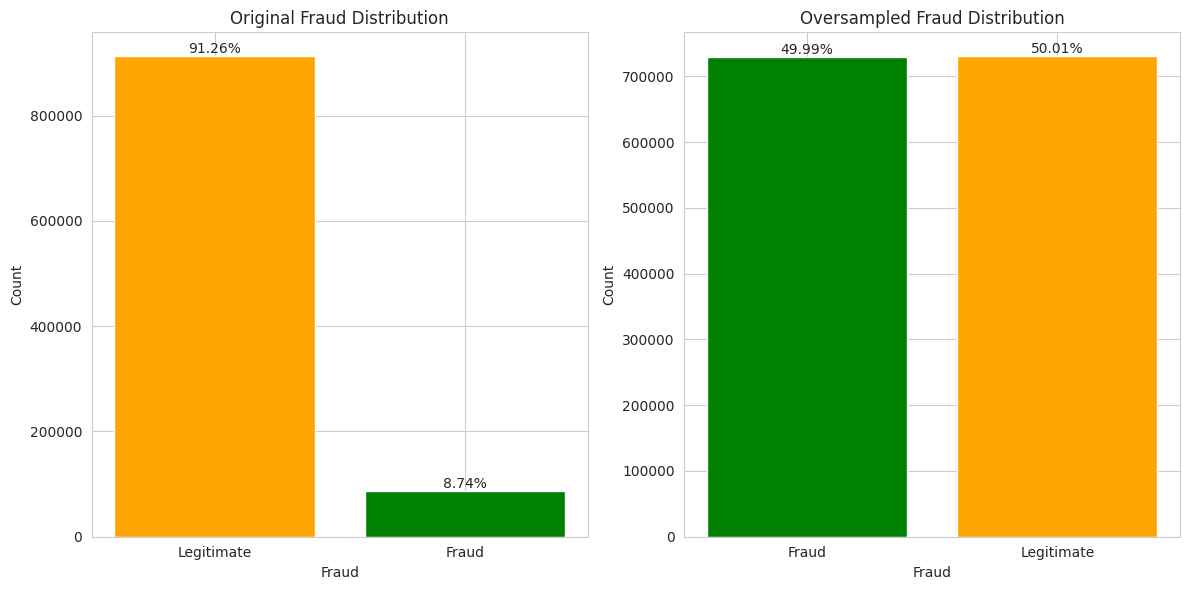

In [ ]:
# Count the occurrences of each class in the original dataset
original_fraud_counts = train_df4["fraud"].value_counts()

# Count the occurrences of each class in the oversampled dataset
oversampled_fraud_counts = y_train4_SMOTE.value_counts()

# Calculate the percentage of each class
original_percentages = original_fraud_counts / len(train_df4) * 100
oversampled_percentages = oversampled_fraud_counts / len(y_train4_SMOTE) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original fraud distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_fraud_counts.index, original_fraud_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Fraud Distribution')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.xticks(original_fraud_counts.index, ['Legitimate', 'Fraud'])

# Bar chart for oversampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(oversampled_fraud_counts.index, oversampled_fraud_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, oversampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Oversampled Fraud Distribution')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.xticks(oversampled_fraud_counts.index, ['Legitimate', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

[1] Logistic Regression -> LR

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train4_SMOTE_scaled, y_train4_SMOTE)
predict_LR = LR_model.predict(X_test4_scaled)
print(classification_report(y_test4, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test4)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_LR = LR_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_LR)

# Calculate AUC
auc_LR = roc_auc_score(y_test4, y_probs_LR)

print('AUC for Logistic Regression: {:.2f}'.format(auc_LR))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86    182678
         1.0       0.88      0.83      0.85    182361

    accuracy                           0.86    365039
   macro avg       0.86      0.86      0.86    365039
weighted avg       0.86      0.86      0.86    365039

Logistic Regression accuracy is: 85.79%
AUC for Logistic Regression: 0.94


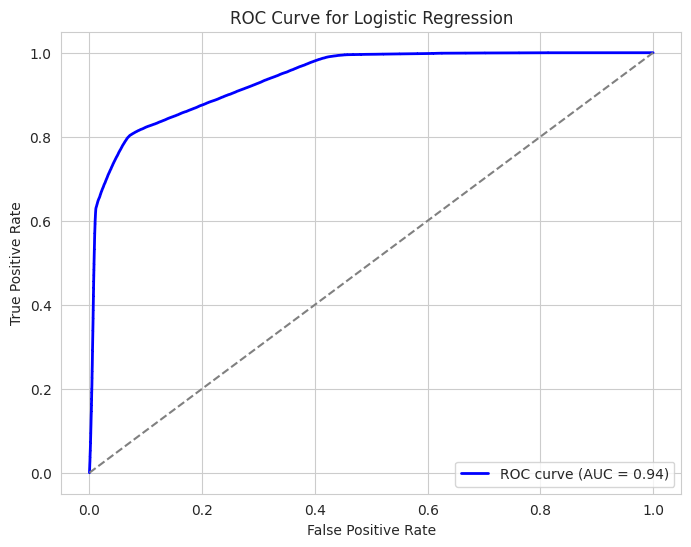

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_LR))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

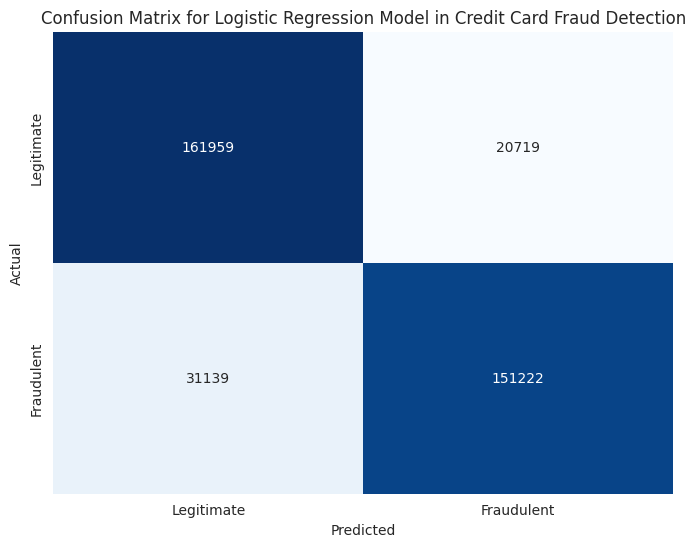

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_LR)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_LR, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_LR]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.879499
1     Recall  0.829245
2   F1-Score  0.853633
3   Accuracy  0.857938
4        AUC  0.939917


[2] Decision Tree Model (ID3)

In [ ]:
DT_model = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT_model.fit(X_train4_SMOTE_scaled, y_train4_SMOTE)
predict_DT = DT_model.predict(X_test4_scaled)
print(classification_report(y_test4, predict_DT))
DT_accuracy = accuracy_score(predict_DT,y_test4)
print('Decision Tree Classifier model accuracy is: {:.2f}%'.format(DT_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_DT = DT_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_DT)

# Calculate AUC
auc_DT = roc_auc_score(y_test4, y_probs_DT)

print('AUC for Decision Tree Classifier: {:.2f}'.format(auc_DT))

              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87    182678
         1.0       0.95      0.74      0.83    182361

    accuracy                           0.85    365039
   macro avg       0.87      0.85      0.85    365039
weighted avg       0.87      0.85      0.85    365039

Decision Tree Classifier model accuracy is: 85.04%
AUC for Decision Tree Classifier: 0.85


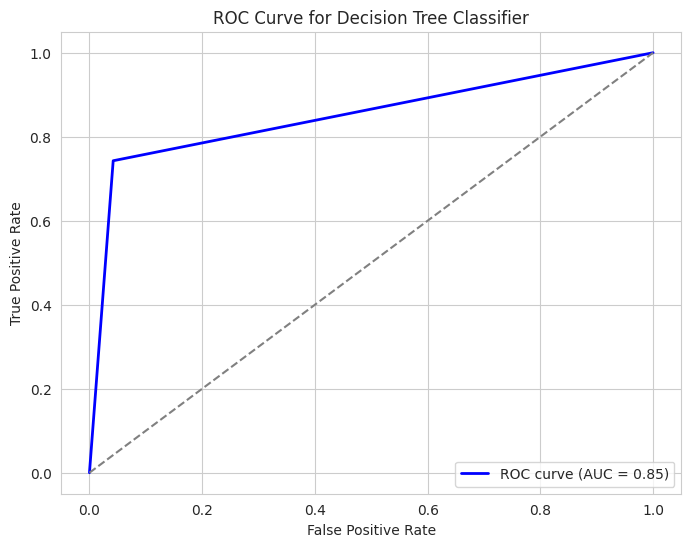

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_DT))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

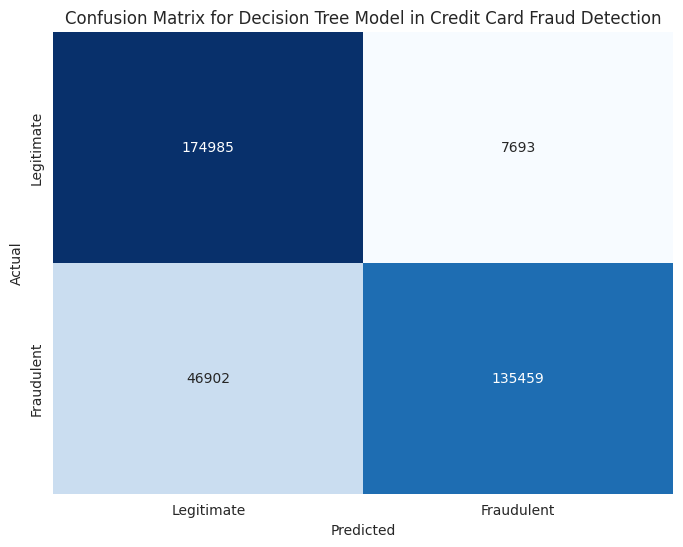

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_DT)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_DT, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_DT]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.946260
1     Recall  0.742807
2   F1-Score  0.832280
3   Accuracy  0.850441
4        AUC  0.850347


[3] XGB Classifier

In [ ]:
# Initialize and train the XGBoost classifier
XGB_model = XGBClassifier(random_state=0)
XGB_model.fit(X_train4_SMOTE_scaled, y_train4_SMOTE)

# Make predictions on the test set
predict_XGB = XGB_model.predict(X_test4_scaled)

# Evaluate the model
print(classification_report(y_test4, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test4)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_XGB = XGB_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_XGB)

# Calculate AUC
auc_XGB = roc_auc_score(y_test4, y_probs_XGB)

print('AUC for XGBoost classifier: {:.2f}'.format(auc_XGB))

              precision    recall  f1-score   support

         0.0       0.83      0.99      0.91    182678
         1.0       0.99      0.80      0.89    182361

    accuracy                           0.90    365039
   macro avg       0.91      0.90      0.90    365039
weighted avg       0.91      0.90      0.90    365039

XGBoost model accuracy is: 89.64%
AUC for XGBoost classifier: 0.97


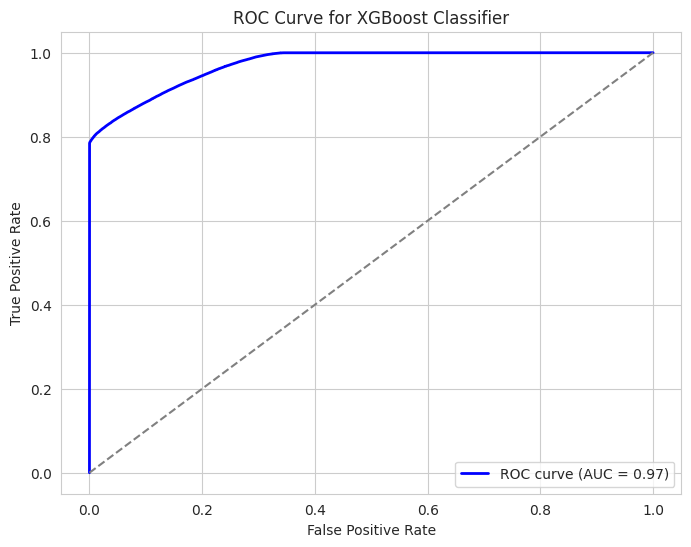

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_XGB))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

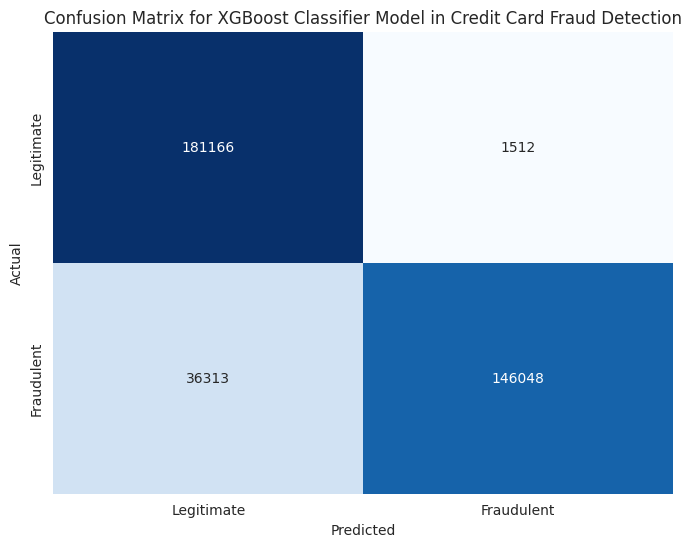

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_XGB)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_XGB, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_XGB]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.989753
1     Recall  0.800873
2   F1-Score  0.885351
3   Accuracy  0.896381
4        AUC  0.972579


[4] Random Forest Classifier

In [ ]:
# Initialize and train the Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)
RF_model.fit(X_train4_SMOTE_scaled, y_train4_SMOTE)

predict_RF = RF_model.predict(X_test4_scaled)

# Evaluate the model
print(classification_report(y_test4, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test4)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_RF = RF_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_RF)

# Calculate AUC
auc_RF = roc_auc_score(y_test4, y_probs_RF)

print('AUC for Random Forest model: {:.2f}'.format(auc_RF))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94    182678
         1.0       0.94      0.93      0.93    182361

    accuracy                           0.94    365039
   macro avg       0.94      0.94      0.94    365039
weighted avg       0.94      0.94      0.94    365039

Random Forest model accuracy is: 93.50%
AUC for Random Forest model: 0.99


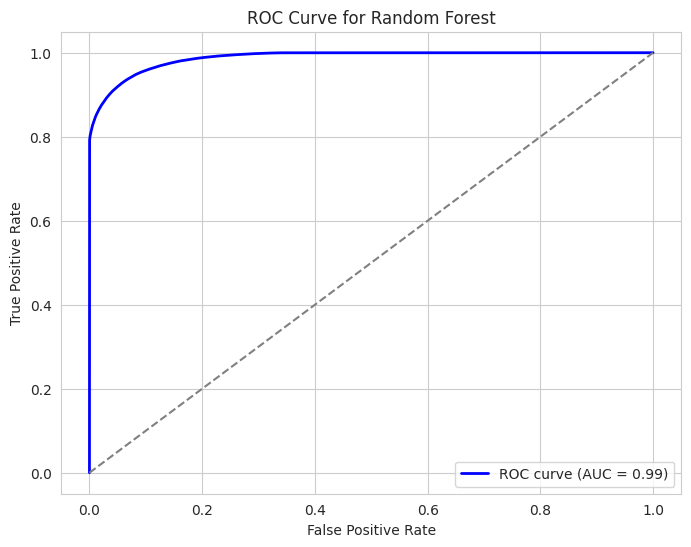

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_RF))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

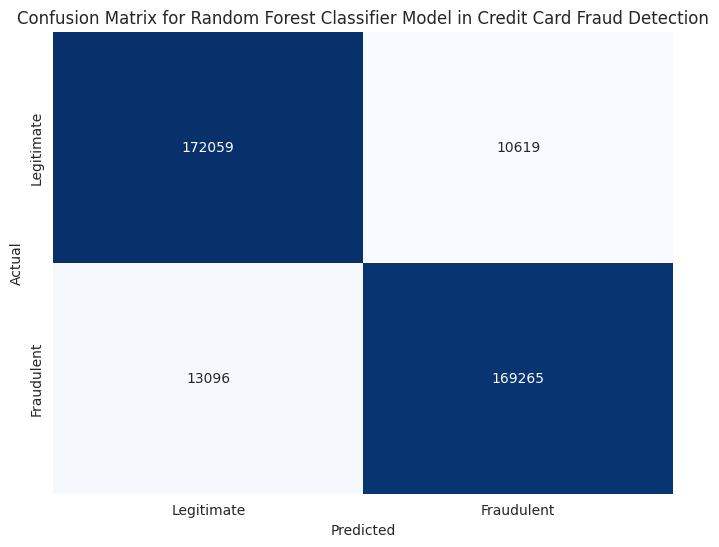

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_RF)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_RF, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_RF]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.940968
1     Recall  0.928186
2   F1-Score  0.934533
3   Accuracy  0.935034
4        AUC  0.987716


[5] K-Nearest Neighbors (KNN) Model

In [ ]:
# Instantiate KNN model
KNN_model = KNeighborsClassifier()

# Train the KNN model
KNN_model.fit(X_train4_SMOTE_scaled, y_train4_SMOTE)

# Make predictions on the test set
predict_KNN = KNN_model.predict(X_test4_scaled)

# Evaluate the performance of KNN model
print("Classification Report for K-Nearest Neighbors (KNN) Model:")
print(classification_report(y_test4, predict_KNN))

# Calculate accuracy
KNN_accuracy = accuracy_score(predict_KNN, y_test4)
print('K-Nearest Neighbors (KNN) accuracy is: {:.2f}%'.format(KNN_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_KNN = KNN_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_KNN)

# Calculate AUC
auc_KNN = roc_auc_score(y_test4, y_probs_KNN)

print('AUC for K-Nearest Neighbors (KNN): {:.2f}'.format(auc_KNN))

Classification Report for K-Nearest Neighbors (KNN) Model:
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92    182678
         1.0       0.92      0.93      0.92    182361

    accuracy                           0.92    365039
   macro avg       0.92      0.92      0.92    365039
weighted avg       0.92      0.92      0.92    365039

K-Nearest Neighbors (KNN) accuracy is: 92.22%
AUC for K-Nearest Neighbors (KNN): 0.98


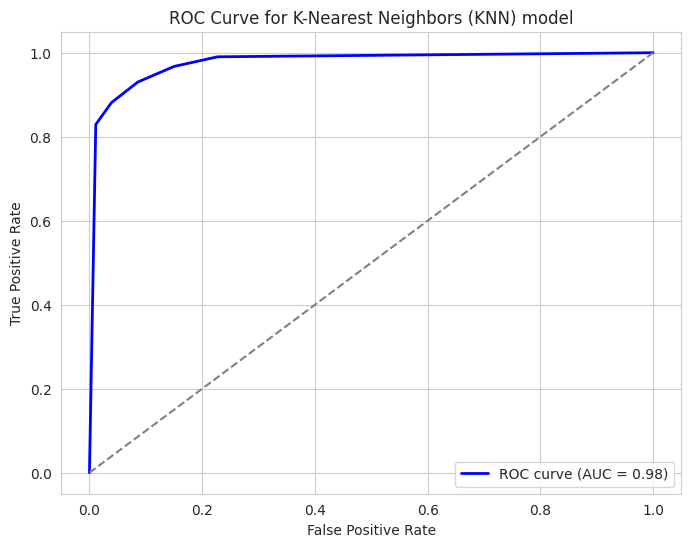

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_KNN))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors (KNN) model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

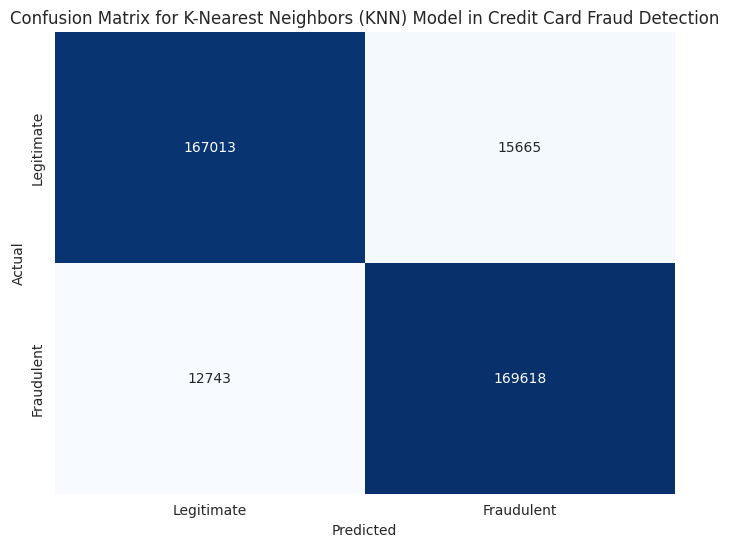

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_KNN)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN) Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_KNN, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_KNN]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.915454
1     Recall  0.930122
2   F1-Score  0.922730
3   Accuracy  0.922178
4        AUC  0.976308


In [ ]:
# Define the metrics for each model and sampling technique

# Define the classification report dictionary for logistic regression
classification_report_dict_LR = classification_report(y_test4, predict_LR, output_dict=True)

metrics_logistic_regression = {
    'precision': "{:.2f}".format(classification_report_dict_LR['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_LR['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_LR['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(LR_accuracy),
    'auc': "{:.2f}".format(auc_LR)
}

# Define the classification report dictionary for decision tree
classification_report_dict_DT = classification_report(y_test4, predict_DT, output_dict=True)

metrics_decision_tree = {
    'precision': "{:.2f}".format(classification_report_dict_DT['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_DT['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_DT['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(DT_accuracy),
    'auc': "{:.2f}".format(auc_DT)
}

# Define the classification report dictionary for XGB Classifier
classification_report_dict_XGB = classification_report(y_test4, predict_XGB, output_dict=True)

metrics_xgb_classifier = {
    'precision': "{:.2f}".format(classification_report_dict_XGB['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_XGB['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_XGB['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(XGB_accuracy),
    'auc': "{:.2f}".format(auc_XGB)
}

# Define the classification report dictionary for Random Forest
classification_report_dict_RF = classification_report(y_test4, predict_RF, output_dict=True)

metrics_random_forest = {
    'precision': "{:.2f}".format(classification_report_dict_RF['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_RF['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_RF['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(RF_accuracy),
    'auc': "{:.2f}".format(auc_RF)
}

# Define the classification report dictionary for KNeighbors Classifier
classification_report_dict_KNN = classification_report(y_test4, predict_KNN, output_dict=True)

metrics_kneighbors = {
    'precision': "{:.2f}".format(classification_report_dict_KNN['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_KNN['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_KNN['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(KNN_accuracy),
    'auc': "{:.2f}".format(auc_KNN)
}

# Create a DataFrame to store the metrics
metrics_df_smote_oversampling = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGB Classifier', 'Random Forest', 'KNeighbors Classifier'],
    'Precision': [metrics_logistic_regression['precision'], metrics_decision_tree['precision'], metrics_xgb_classifier['precision'], metrics_random_forest['precision'], metrics_kneighbors['precision']],
    'Recall': [metrics_logistic_regression['recall'], metrics_decision_tree['recall'], metrics_xgb_classifier['recall'], metrics_random_forest['recall'], metrics_kneighbors['recall']],
    'F1-Score': [metrics_logistic_regression['f1-score'], metrics_decision_tree['f1-score'], metrics_xgb_classifier['f1-score'], metrics_random_forest['f1-score'], metrics_kneighbors['f1-score']],
    'Accuracy': [metrics_logistic_regression['accuracy'], metrics_decision_tree['accuracy'], metrics_xgb_classifier['accuracy'], metrics_random_forest['accuracy'], metrics_kneighbors['accuracy']],
    'AUC': [metrics_logistic_regression['auc'], metrics_decision_tree['auc'], metrics_xgb_classifier['auc'], metrics_random_forest['auc'], metrics_kneighbors['auc']]
})

# Print the DataFrame
print("Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for datasdet 4 with SMOTE Oversampling:")
print(metrics_df_smote_oversampling)

Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for datasdet 4 with SMOTE Oversampling:
                   Model Precision Recall F1-Score Accuracy   AUC
0    Logistic Regression      0.88   0.83     0.85     0.86  0.94
1          Decision Tree      0.95   0.74     0.83     0.85  0.85
2         XGB Classifier      0.99   0.80     0.89     0.90  0.97
3          Random Forest      0.94   0.93     0.93     0.94  0.99
4  KNeighbors Classifier      0.92   0.93     0.92     0.92  0.98


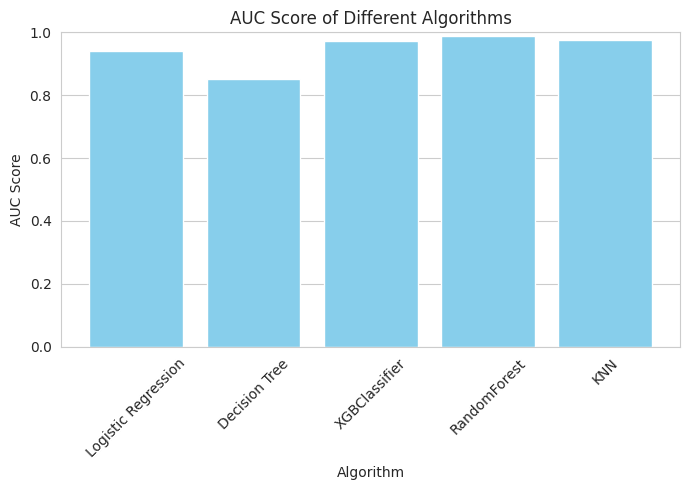

In [ ]:
Algorithms = ['Logistic Regression', 'Decision Tree', 'XGBClassifier', 'RandomForest', 'KNN']
AUC = [auc_LR, auc_DT, auc_XGB, auc_RF, auc_KNN]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'AUC Score':AUC})

plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['AUC Score'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('AUC Score')
plt.title('AUC Score of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (AUC Score ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Case 3: ADASYN Oversampling**

In [ ]:
# Separating the labels

X_train4_ADASYN = train_df4.drop('fraud', axis=1)
y_train4_ADASYN = train_df4['fraud']

In [ ]:
# Splitting the dataset
X_train4_ADASYN, X_test4, y_train4_ADASYN, y_test4 = train_test_split(X_train4_ADASYN, y_train4_ADASYN, test_size=0.2, random_state=65)

In [ ]:
# Initialize the ADASYN object
adasyn = ADASYN(random_state=42)

# Apply ADASYN to the training data
X_train4_ADASYN, y_train4_ADASYN = adasyn.fit_resample(X_train4_ADASYN, y_train4_ADASYN)

In [ ]:
# Feature Scaling

scaler = StandardScaler()
X_train4_ADASYN_scaled = scaler.fit_transform(X_train4_ADASYN)
X_test4_scaled = scaler.transform(X_test4)

In [ ]:
# Checking newly created data
print('Current length of the training set: ', len(y_train4_ADASYN))

Current length of the training set:  1459328


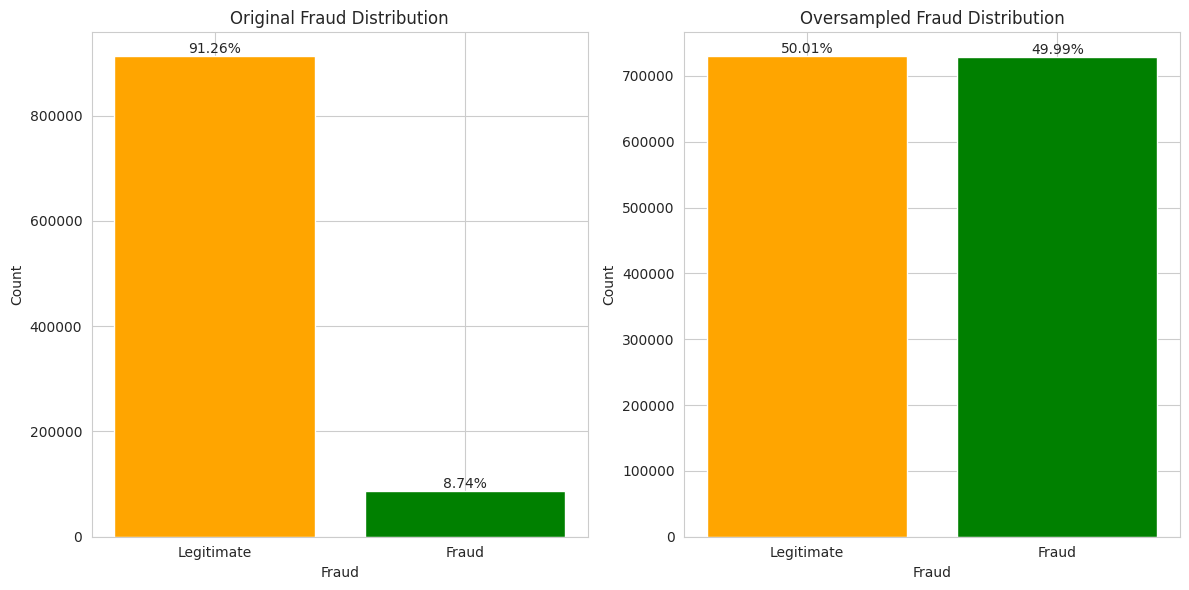

In [ ]:
# Count the occurrences of each class in the original dataset
original_fraud_counts = train_df4["fraud"].value_counts()

# Count the occurrences of each class in the downsampled dataset
oversampled_fraud_counts = y_train4_ADASYN.value_counts()

# Calculate the percentage of each class
original_percentages = original_fraud_counts / len(train_df4) * 100
oversampled_percentages = oversampled_fraud_counts / len(y_train4_ADASYN) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original fraud distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_fraud_counts.index, original_fraud_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Fraud Distribution')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.xticks(original_fraud_counts.index, ['Legitimate', 'Fraud'])

# Bar chart for oversampled fraud distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(oversampled_fraud_counts.index, oversampled_fraud_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, oversampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Oversampled Fraud Distribution')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.xticks(oversampled_fraud_counts.index, ['Legitimate', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

**MACHINE LEARNING MODEL TRAINING**

[1] Logistic Regression -> LR

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train4_ADASYN_scaled, y_train4_ADASYN)
predict_LR = LR_model.predict(X_test4_scaled)
print(classification_report(y_test4, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test4)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_LR = LR_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_LR)

# Calculate AUC
auc_LR = roc_auc_score(y_test4, y_probs_LR)

print('AUC for Logistic Regression: {:.2f}'.format(auc_LR))

              precision    recall  f1-score   support

         0.0       0.99      0.67      0.80    182806
         1.0       0.21      0.90      0.34     17194

    accuracy                           0.69    200000
   macro avg       0.60      0.79      0.57    200000
weighted avg       0.92      0.69      0.76    200000

Logistic Regression accuracy is: 69.27%
AUC for Logistic Regression: 0.89


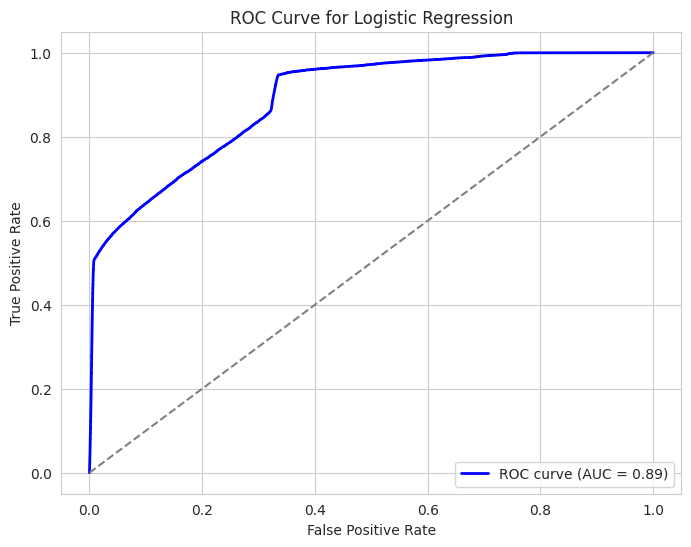

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_LR))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

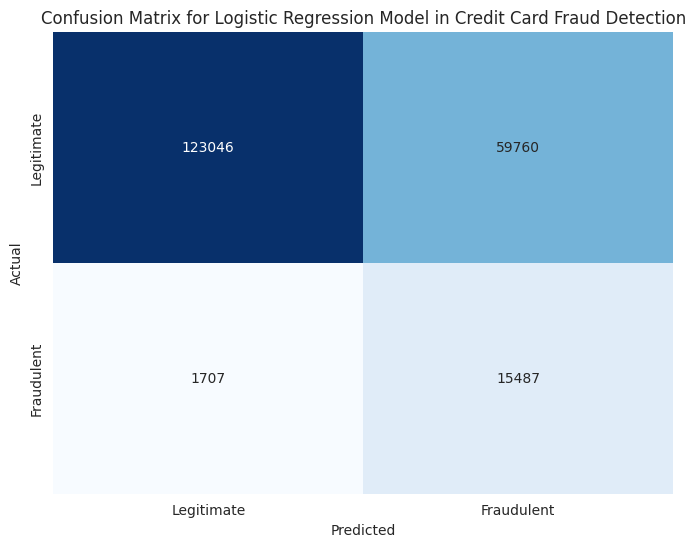

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_LR)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_LR, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_LR]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.205816
1     Recall  0.900721
2   F1-Score  0.335068
3   Accuracy  0.692665
4        AUC  0.889297


[2] Decision Tree Model (ID3)

In [ ]:
DT_model = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT_model.fit(X_train4_ADASYN_scaled, y_train4_ADASYN)
predict_DT = DT_model.predict(X_test4_scaled)
print(classification_report(y_test4, predict_DT))
DT_accuracy = accuracy_score(predict_DT,y_test4)
print('Decision Tree Classifier model accuracy is: {:.2f}%'.format(DT_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_DT = DT_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_DT)

# Calculate AUC
auc_DT = roc_auc_score(y_test4, y_probs_DT)

print('AUC for Decision Tree Classifier: {:.2f}'.format(auc_DT))

              precision    recall  f1-score   support

         0.0       0.94      0.36      0.52    182806
         1.0       0.10      0.74      0.17     17194

    accuracy                           0.39    200000
   macro avg       0.52      0.55      0.35    200000
weighted avg       0.86      0.39      0.49    200000

Decision Tree Classifier model accuracy is: 39.10%
AUC for Decision Tree Classifier: 0.55


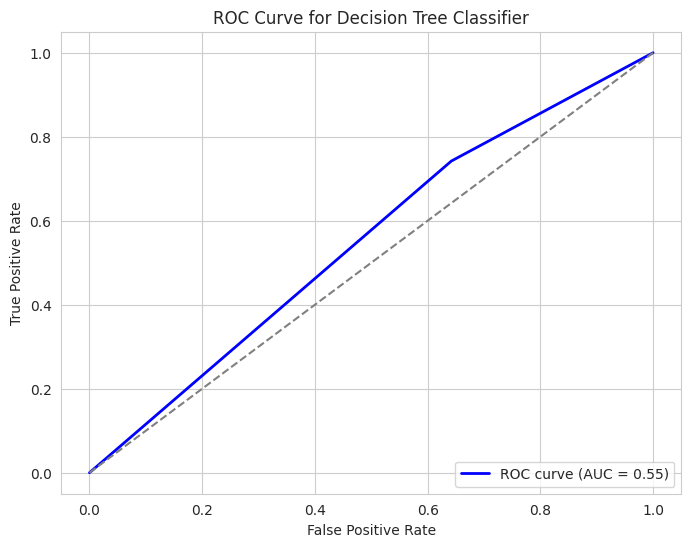

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_DT))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

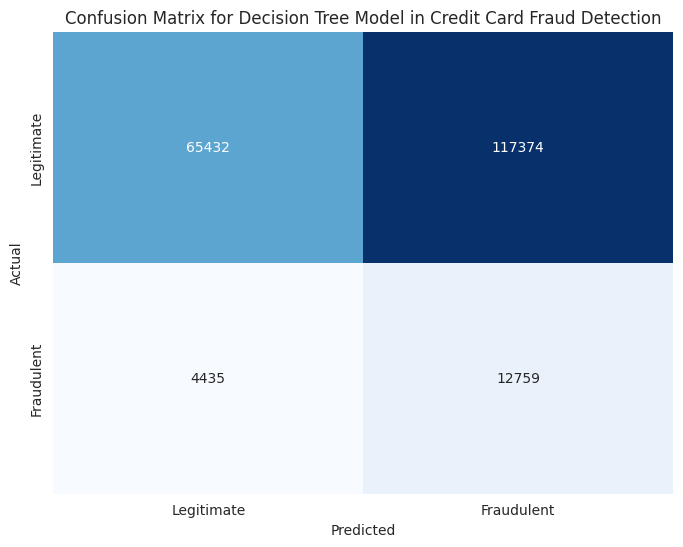

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_DT)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_DT, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_DT]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.098046
1     Recall  0.742061
2   F1-Score  0.173207
3   Accuracy  0.390955
4        AUC  0.549996


[3] XGB Classifier

In [ ]:
# Initialize and train the XGBoost classifier
XGB_model = XGBClassifier(random_state=0)
XGB_model.fit(X_train4_ADASYN_scaled, y_train4_ADASYN)

# Make predictions on the test set
predict_XGB = XGB_model.predict(X_test4_scaled)

# Evaluate the model
print(classification_report(y_test4, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test4)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_XGB = XGB_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_XGB)

# Calculate AUC
auc_XGB = roc_auc_score(y_test4, y_probs_XGB)

print('AUC for XGBoost classifier: {:.2f}'.format(auc_XGB))

              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81    182806
         1.0       0.22      0.98      0.36     17194

    accuracy                           0.71    200000
   macro avg       0.61      0.83      0.59    200000
weighted avg       0.93      0.71      0.77    200000

XGBoost model accuracy is: 70.58%
AUC for XGBoost classifier: 0.96


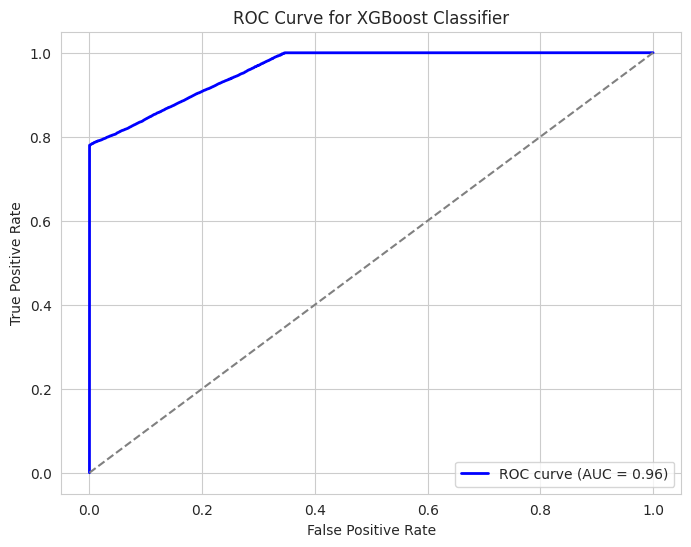

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_XGB))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

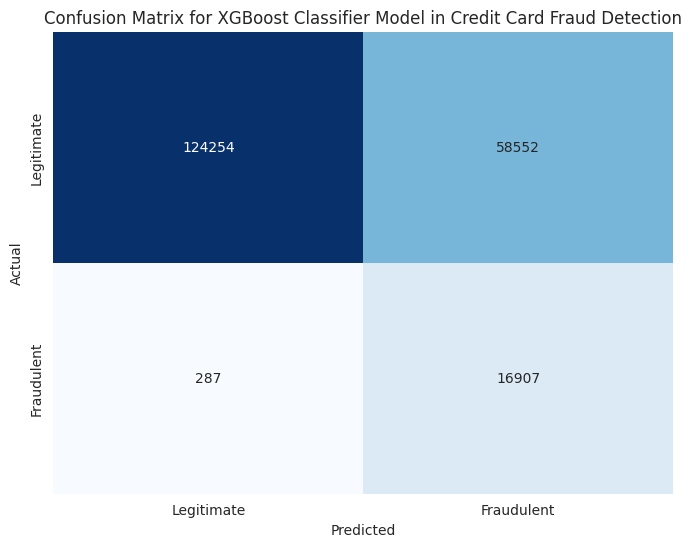

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_XGB)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_XGB, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_XGB]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.224055
1     Recall  0.983308
2   F1-Score  0.364953
3   Accuracy  0.705805
4        AUC  0.961723


[4] Random Forest Classifier

In [ ]:
# Initialize and train the Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)
RF_model.fit(X_train4_ADASYN_scaled, y_train4_ADASYN)

predict_RF = RF_model.predict(X_test4_scaled)

# Evaluate the model
print(classification_report(y_test4, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test4)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_RF = RF_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_RF)

# Calculate AUC
auc_RF = roc_auc_score(y_test4, y_probs_RF)

print('AUC for Random Forest classifier: {:.2f}'.format(auc_RF))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92    182806
         1.0       0.37      0.87      0.52     17194

    accuracy                           0.86    200000
   macro avg       0.68      0.86      0.72    200000
weighted avg       0.93      0.86      0.89    200000

Random Forest model accuracy is: 86.39%
AUC for Random Forest classifier: 0.96


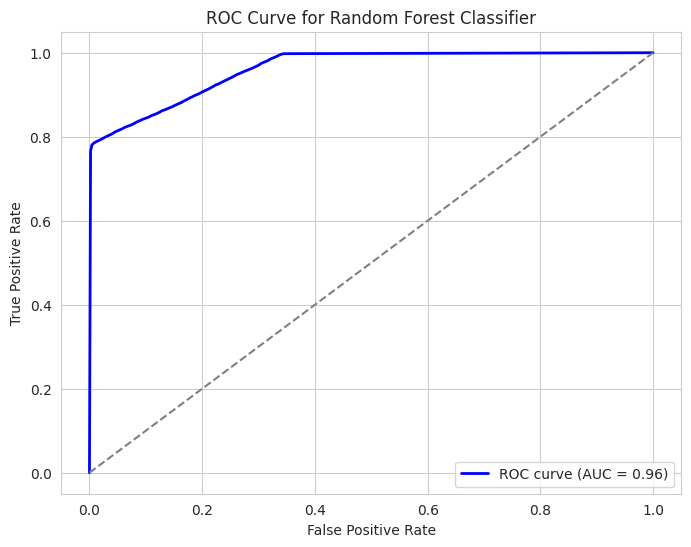

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_RF))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

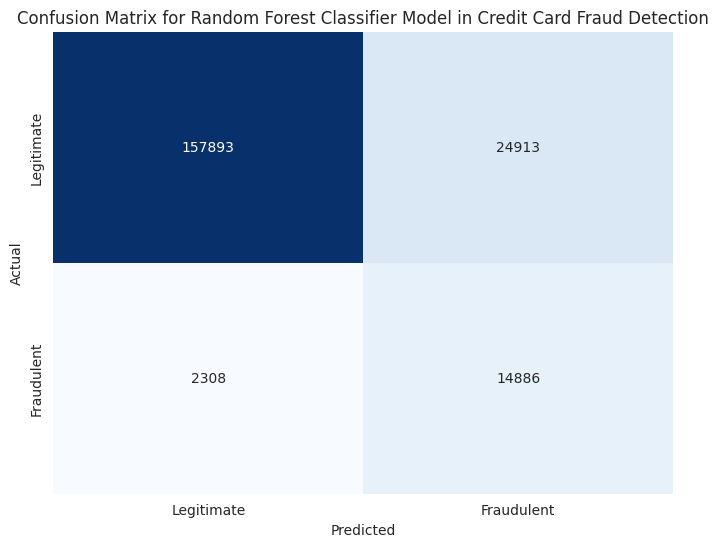

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_RF)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_RF, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_RF]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.374029
1     Recall  0.865767
2   F1-Score  0.522380
3   Accuracy  0.863895
4        AUC  0.960468


[5] K-Nearest Neighbors (KNN) Model

In [ ]:
# Instantiate KNN model
KNN_model = KNeighborsClassifier()

# Train the KNN model
KNN_model.fit(X_train4_ADASYN_scaled, y_train4_ADASYN)

# Make predictions on the test set
predict_KNN = KNN_model.predict(X_test4_scaled)

# Evaluate the performance of KNN model
print("Classification Report for K-Nearest Neighbors (KNN) Model:")
print(classification_report(y_test4, predict_KNN))

# Calculate accuracy
KNN_accuracy = accuracy_score(predict_KNN, y_test4)
print('K-Nearest Neighbors (KNN) accuracy is: {:.2f}%'.format(KNN_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_KNN = KNN_model.predict_proba(X_test4_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test4, y_probs_KNN)

# Calculate AUC
auc_KNN = roc_auc_score(y_test4, y_probs_KNN)

print('AUC for K-Nearest Neighbors (KNN): {:.2f}'.format(auc_KNN))

Classification Report for K-Nearest Neighbors (KNN) Model:
              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89    182806
         1.0       0.31      0.90      0.46     17194

    accuracy                           0.82    200000
   macro avg       0.65      0.85      0.68    200000
weighted avg       0.93      0.82      0.85    200000

K-Nearest Neighbors (KNN) accuracy is: 81.86%
AUC for K-Nearest Neighbors (KNN): 0.93


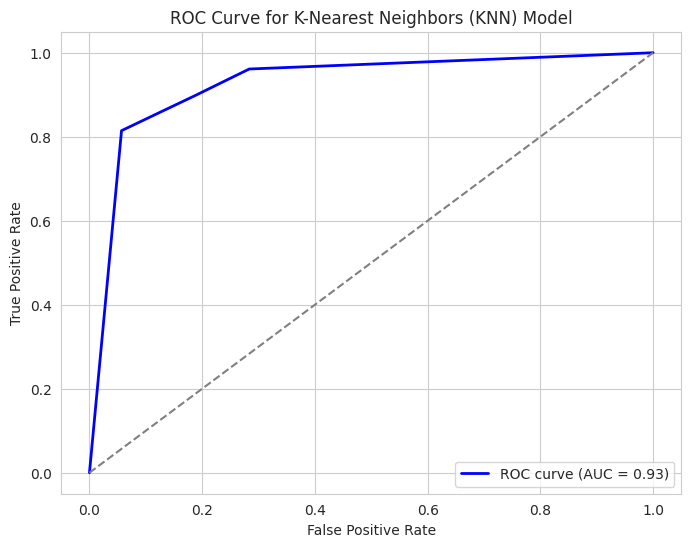

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_KNN))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors (KNN) Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

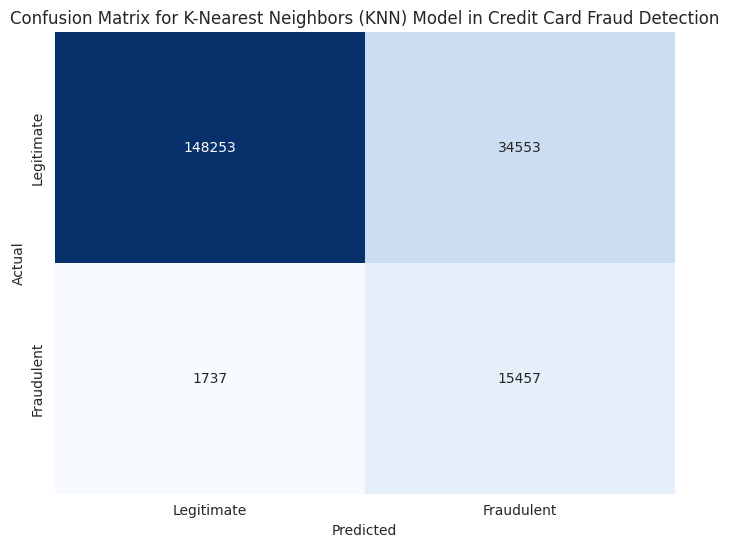

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test4, predict_KNN)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN) Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test4, predict_KNN, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1.0']['precision']
recall = classification_report_dict['1.0']['recall']
f1_score = classification_report_dict['1.0']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_KNN]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.309078
1     Recall  0.898976
2   F1-Score  0.460002
3   Accuracy  0.818550
4        AUC  0.926840


In [ ]:
# Define the metrics for each model and sampling technique

# Define the classification report dictionary for logistic regression
classification_report_dict_LR = classification_report(y_test4, predict_LR, output_dict=True)

metrics_logistic_regression = {
    'precision': "{:.2f}".format(classification_report_dict_LR['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_LR['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_LR['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(LR_accuracy),
    'auc': "{:.2f}".format(auc_LR)
}

# Define the classification report dictionary for decision tree
classification_report_dict_DT = classification_report(y_test4, predict_DT, output_dict=True)

metrics_decision_tree = {
    'precision': "{:.2f}".format(classification_report_dict_DT['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_DT['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_DT['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(DT_accuracy),
    'auc': "{:.2f}".format(auc_DT)
}

# Define the classification report dictionary for XGB Classifier
classification_report_dict_XGB = classification_report(y_test4, predict_XGB, output_dict=True)

metrics_xgb_classifier = {
    'precision': "{:.2f}".format(classification_report_dict_XGB['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_XGB['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_XGB['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(XGB_accuracy),
    'auc': "{:.2f}".format(auc_XGB)
}

# Define the classification report dictionary for Random Forest
classification_report_dict_RF = classification_report(y_test4, predict_RF, output_dict=True)

metrics_random_forest = {
    'precision': "{:.2f}".format(classification_report_dict_RF['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_RF['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_RF['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(RF_accuracy),
    'auc': "{:.2f}".format(auc_RF)
}

# Define the classification report dictionary for KNeighbors Classifier
classification_report_dict_KNN = classification_report(y_test4, predict_KNN, output_dict=True)

metrics_kneighbors = {
    'precision': "{:.2f}".format(classification_report_dict_KNN['1.0']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_KNN['1.0']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_KNN['1.0']['f1-score']),
    'accuracy': "{:.2f}".format(KNN_accuracy),
    'auc': "{:.2f}".format(auc_KNN)
}

# Create a DataFrame to store the metrics
metrics_df_adasyn_oversampling = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGB Classifier', 'Random Forest', 'KNeighbors Classifier'],
    'Precision': [metrics_logistic_regression['precision'], metrics_decision_tree['precision'], metrics_xgb_classifier['precision'], metrics_random_forest['precision'], metrics_kneighbors['precision']],
    'Recall': [metrics_logistic_regression['recall'], metrics_decision_tree['recall'], metrics_xgb_classifier['recall'], metrics_random_forest['recall'], metrics_kneighbors['recall']],
    'F1-Score': [metrics_logistic_regression['f1-score'], metrics_decision_tree['f1-score'], metrics_xgb_classifier['f1-score'], metrics_random_forest['f1-score'], metrics_kneighbors['f1-score']],
    'Accuracy': [metrics_logistic_regression['accuracy'], metrics_decision_tree['accuracy'], metrics_xgb_classifier['accuracy'], metrics_random_forest['accuracy'], metrics_kneighbors['accuracy']],
    'AUC': [metrics_logistic_regression['auc'], metrics_decision_tree['auc'], metrics_xgb_classifier['auc'], metrics_random_forest['auc'], metrics_kneighbors['auc']]
})

# Print the DataFrame
print("Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for dataset 4 with ADASYN Oversampling:")
print(metrics_df_adasyn_oversampling)

Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for dataset 4 with ADASYN Oversampling:
                   Model Precision Recall F1-Score Accuracy   AUC
0    Logistic Regression      0.21   0.90     0.34     0.69  0.89
1          Decision Tree      0.10   0.74     0.17     0.39  0.55
2         XGB Classifier      0.22   0.98     0.36     0.71  0.96
3          Random Forest      0.37   0.87     0.52     0.86  0.96
4  KNeighbors Classifier      0.31   0.90     0.46     0.82  0.93


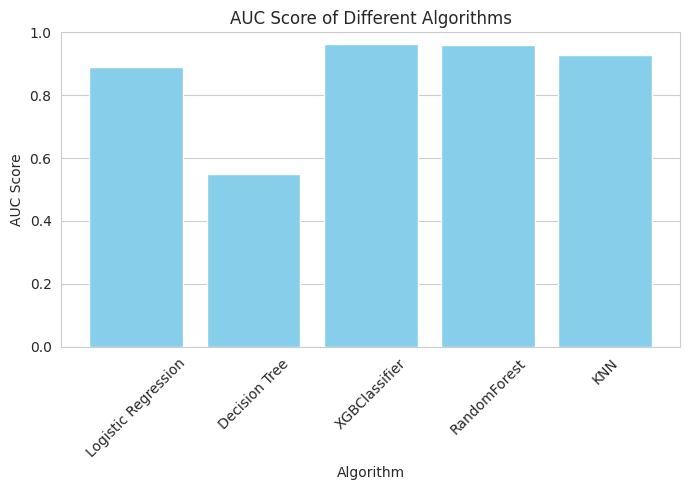

In [ ]:
Algorithms = ['Logistic Regression', 'Decision Tree', 'XGBClassifier', 'RandomForest', 'KNN']
AUC = [auc_LR, auc_DT, auc_XGB, auc_RF, auc_KNN]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'AUC Score':AUC})

plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['AUC Score'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('AUC Score')
plt.title('AUC Score of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (AUC Score ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()